# Contenido <a id='cont'></a>

* [Introducción](#int)
* [Prepara los datos](#pre)
* [Procesamiento los datos](#pro)
* [Exploración de datos](#exp)
* [Entrenamiento de modelos predictivos por región](#ent)
* [Cálculo de ganancias](#gan)
* [Evaluación de riesgos](#rie)
* [Conclusión general](#con)

# Introducción <a id='int'></a>

La compañía minera OilyGiant requiere encontrar el mejor lugar para un nuevo pozo. Para elegir la ubicación se debe:
- Recolectar los parámetros del pozo de petróleo en la región seleccionada: calidad del petróleo y volumen de reservas;
- Construir un modelo para predecir el volumen de reservas en los nuevos pozos;
- Selecciona los pozos de petróleo con los valores estimados más altos;
- Elige la región con el mayor beneficio total para los pozos de petróleo seleccionados.

Tenemos datos sobre muestras de crudo de tres regiones. Ya conocemos los parámetros de cada pozo petrolero de la región.

**Condiciones**:
- Solo la regresión lineal es adecuada para el entrenamiento de modelos (el resto no son lo suficientemente predecibles).
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
- Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

## Objetivo <a id='obj'></a>

- Crear un modelo que ayude a elegir la región con el mayor margen de beneficio. 
- Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

# Prepara los datos <a id='pre'></a>

Importamos librerías:

In [1]:
# generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # machine learning 
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score

Cargamos datasets:

In [2]:
# carga de datos
try:
    region_1 = pd.read_csv('geo_data_0.csv')
    region_2 = pd.read_csv('geo_data_1.csv')
    region_3 = pd.read_csv('geo_data_2.csv')
except:
    region_1 = pd.read_csv('/datasets/geo_data_0.csv')
    region_2 = pd.read_csv('/datasets/geo_data_1.csv')
    region_3 = pd.read_csv('/datasets/geo_data_2.csv')

Examina los datos:

Los datos de exploración geológica de las tres regiones se almacenan en archivos: `geo_data_0.csv`, `geo_data_1.csv`, `geo_data_2.csv`
- *id* — identificador único de pozo de petróleo
- *f0, f1, f2* — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- *product* — volumen de reservas en el pozo de petróleo (miles de barriles).

In [3]:
print('Region 1')

display(region_1.head())
print()
region_1.info()

Region 1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
print('Region 2')

display(region_2.head())
print()
region_2.info()

Region 2


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
print('Region 3')

display(region_3.head())
print()
region_3.info()

Region 3


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
print('Duplicated: ',region_1.duplicated().sum(), region_2.duplicated().sum(), region_3.duplicated().sum())

Duplicated:  0 0 0


Los 3 dataset cuentan con 100.000 registros en cada uno, no hay valores ausentes ni duplicados. Los tipos de datos son correctos.

In [7]:
dupli = region_1.query('id.duplicated()').id.tolist()
region_1.query('id in @dupli').sort_values(by='id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


En el dataset de la región 1 observamos 10 pozos duplicados: `'HZww2', 'bxg6G', 'A5aEY', 'QcMuo', '74z30', 'AGS9W', 'Tdehs', 'fiKDv', 'TtcGQ', 'bsk9y'`. La tabla muestra 2 registros por cada pozo duplicado.

In [8]:
dupli_2 = region_2.query('id.duplicated()').id.tolist()
region_2.query('id in @dupli_2').sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


En el dataset de la región 2 vemos que hay 4 pozos duplicados: `5ltQ6, LHZR0, bfPNe, wt4Uk`. La tabla muestra los registros duplicados.

In [9]:
dupli_3 = region_3.query('id.duplicated()').id.tolist()
region_3.query('id in @dupli_3').sort_values(by='id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


En el dataset de la región 3 vemos que hay 4 pozos duplicados: `'xCHr8', 'VF7Jo', 'KUPhW', 'Vcm5J'`. En la tabla observamos los registros duplicados.

Se deciden dejar los pozos duplicados, puesto que no tenemos información respecto a por qué están duplicados. Estos registros son mínimos respecto a la totalidad de registros del dataset, por lo que es irrelevante dejarlos o quitarlos.

# Procesamiento de datos <a id='pro'></a>

Para el procesamiento de datos realizaremos un **escalado de características** para las columnas 'f0', 'f1', 'f2'.

In [10]:
# Escalado de características

numeric = ['f0', 'f1', 'f2']

# Región 1
scaler1 = StandardScaler()
scaler1.fit(region_1[numeric])
region_1[numeric] = scaler1.transform(region_1[numeric])

# Región 2
scaler2 = StandardScaler()
scaler2.fit(region_2[numeric])
region_2[numeric] = scaler2.transform(region_2[numeric])

# Región 3
scaler3 = StandardScaler()
scaler3.fit(region_3[numeric])
region_3[numeric] = scaler3.transform(region_3[numeric])

Una vez que hemos realizado el escalado para todas las características f0, f1 y f2 en cada dataset de cada región, vamos a visualizar como se ven sus distribuciones de datos.

# Exploración de los datos  <a id='exp'></a>

Revisaremos la distribución de los datos de las características y objetivo por cada región. Así como buscar correlaciones entre variables.

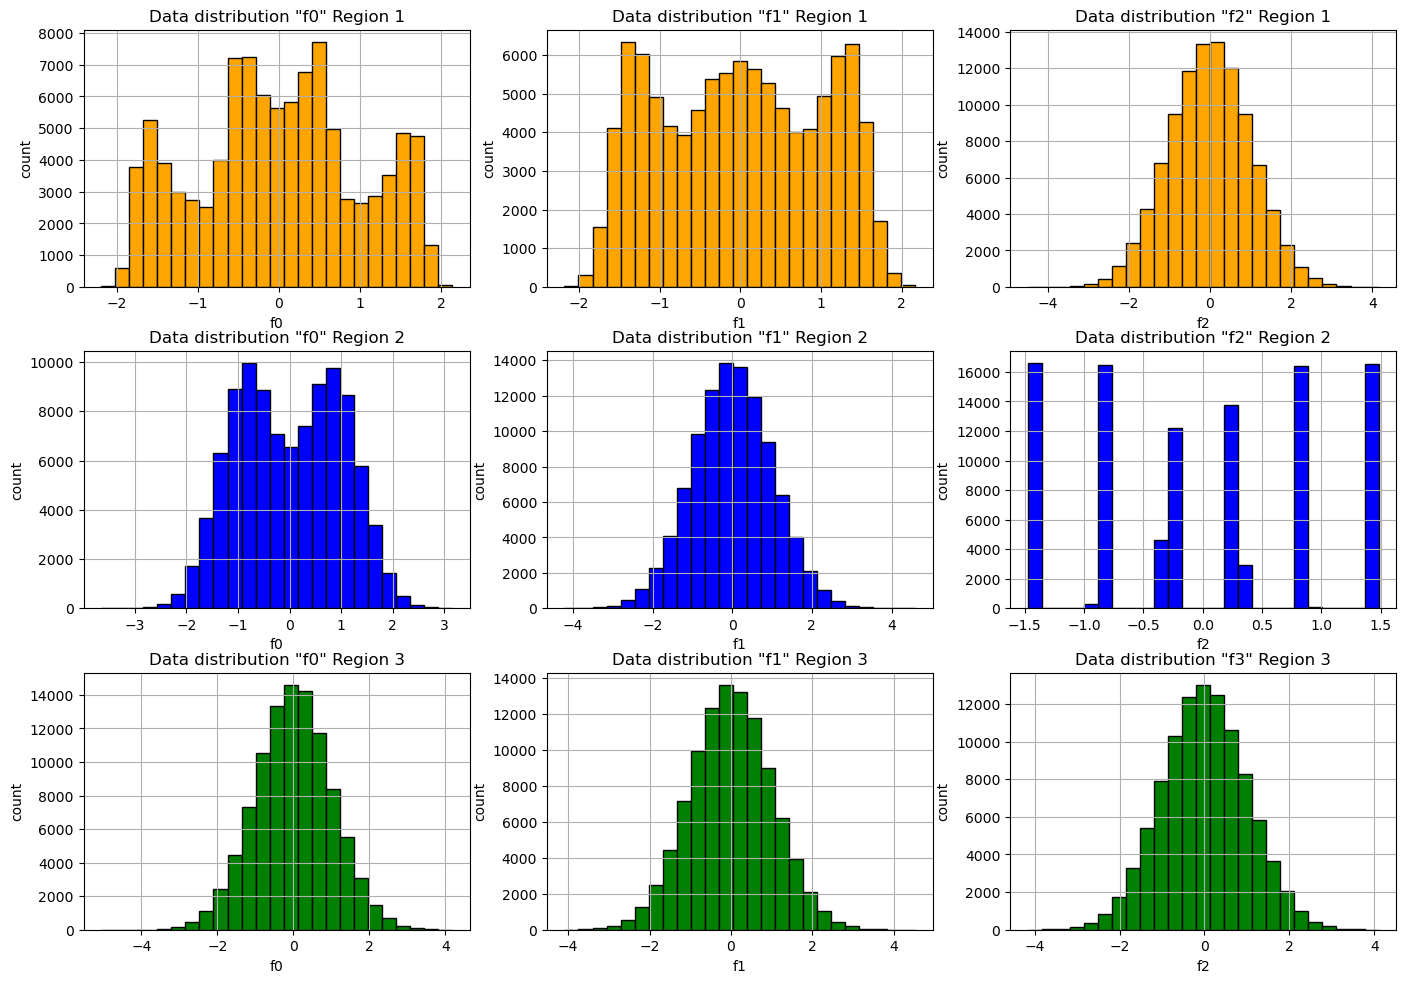

In [11]:
# Gráficos para revisar las distribuciones de los datos por Región

fig, ((a,b,c),(d,e,f),(g,h,i))= plt.subplots(figsize=(15,10), nrows=3, ncols=3)

# Gráfico 1
region_1['f0'].hist(bins=25, 
               ax=a, 
               color='orange',
               edgecolor='black')
a.set_xlabel('f0')
a.set_ylabel('count')
a.set_title('Data distribution "f0" Region 1')

region_1['f1'].hist(bins=25, 
               ax=b, 
               color='orange',
               edgecolor='black')
b.set_xlabel('f1')
b.set_ylabel('count')
b.set_title('Data distribution "f1" Region 1')

region_1['f2'].hist(bins=25, 
               ax=c, 
               color='orange',
               edgecolor='black')
c.set_xlabel('f2')
c.set_ylabel('count')
c.set_title('Data distribution "f2" Region 1')

# Gráfico 2
region_2['f0'].hist(bins=25, 
               ax=d, 
               color='blue',
               edgecolor='black')
d.set_xlabel('f0')
d.set_ylabel('count')
d.set_title('Data distribution "f0" Region 2')

region_2['f1'].hist(bins=25, 
               ax=e, 
               color='blue',
               edgecolor='black')
e.set_xlabel('f1')
e.set_ylabel('count')
e.set_title('Data distribution "f1" Region 2')

region_2['f2'].hist(bins=25, 
               ax=f, 
               color='blue',
               edgecolor='black')
f.set_xlabel('f2')
f.set_ylabel('count')
f.set_title('Data distribution "f2" Region 2')


# Gráfico 3
region_3['f0'].hist(bins=25, 
               ax=g, 
               color='green',
               edgecolor='black')
g.set_xlabel('f0')
g.set_ylabel('count')
g.set_title('Data distribution "f0" Region 3')

region_3['f1'].hist(bins=25, 
               ax=h, 
               color='green',
               edgecolor='black')
h.set_xlabel('f1')
h.set_ylabel('count')
h.set_title('Data distribution "f1" Region 3')


region_3['f2'].hist(bins=25, 
               ax=i, 
               color='green',
               edgecolor='black')
i.set_xlabel('f2')
i.set_ylabel('count')
i.set_title('Data distribution "f3" Region 3')


# Ajustes
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.25)

plt.show()

Podemos apreciar en las gráficas, las distribuciones de datos en cada característica de cada pozo de petróleo por región.

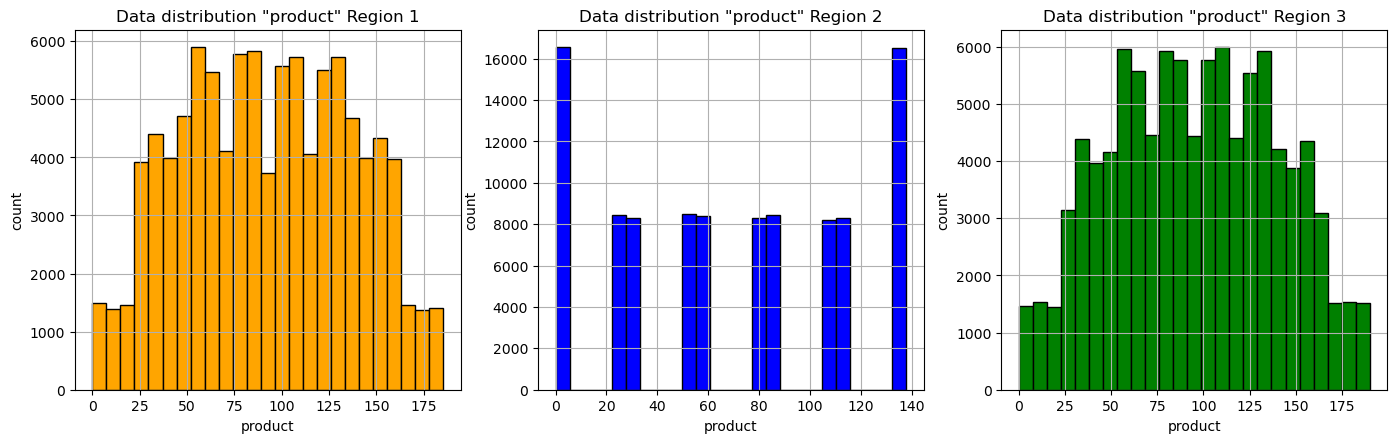

In [12]:
# Gráficos para revisar las distribuciones de nuestra variable objetivo

fig, ((a,b,c))= plt.subplots(figsize=(15,4), nrows=1, ncols=3)

# Gráfico 1
region_1['product'].hist(bins=25, 
               ax=a, 
               color='orange',
               edgecolor='black')
a.set_xlabel('product')
a.set_ylabel('count')
a.set_title('Data distribution "product" Region 1')


# Gráfico 2
region_2['product'].hist(bins=25, 
               ax=b, 
               color='blue',
               edgecolor='black')
b.set_xlabel('product')
b.set_ylabel('count')
b.set_title('Data distribution "product" Region 2')


# Gráfico 3
region_3['product'].hist(bins=25, 
               ax=c, 
               color='green',
               edgecolor='black')
c.set_xlabel('product')
c.set_ylabel('count')
c.set_title('Data distribution "product" Region 3')

# Ajustes
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

Hemos graficado y podemos tener una vista de como se encuentran distribuidos los datos de nueva variable objetivo "product" por cada región. 

## Correlaciones:

Revisemos las correlaciones a continuación:

In [13]:
region_1.corr(numeric_only=True)

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [14]:
region_2.corr(numeric_only=True)

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [15]:
region_3.corr(numeric_only=True)

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


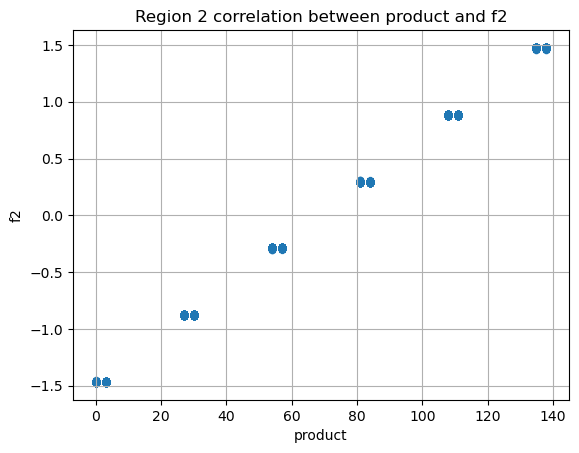

In [16]:
region_2.plot(x='product', y='f2', kind='scatter', grid=True, alpha=0.5)
plt.title('Region 2 correlation between product and f2')
plt.show()


Hemos revisado las correlaciones de nuestras variables en cada dataset y podemos notar que nuestra variable dependiente `product` y la variable independiente `f2` es fuerte, resaltando esta correlación en la region 2 con el valor de 0.99 y lo podemos apreciar en la gráfica anterior.

## Entrenamiento de modelos predictivos por región  <a id='ent'></a>

Vamos a entrenar un modelo para predecir el volumen de reservas de petróleo para los nuevos pozos en cada región. Realizaremos los siguientes pasos:
- Segmentaremos los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25.
- Entrenaremos el modelo y haremos predicciones para el conjunto de validación.
- Guardaremos las predicciones y las respuestas correctas para el conjunto de validación.
- Calcularemos el volumen promedio de las reservas previstas y las métricas de evaluación: RECM, EAM, R2.

In [17]:
# Segmentación de datos de entrenamiento y validación en proporcion 75:25 por región

# Region 1
features_r1 = region_1.drop(['id', 'product'], axis=1)
target_r1 = region_1['product']
features_train_r1, features_valid_r1, target_train_r1, target_valid_r1 = train_test_split(
    features_r1, target_r1, test_size=0.25, random_state=12345)

# Region 2
features_r2 = region_2.drop(['id', 'product'], axis=1)
target_r2 = region_2['product']
features_train_r2, features_valid_r2, target_train_r2, target_valid_r2 = train_test_split(
    features_r2, target_r2, test_size=0.25, random_state=12345)

# Region 3
features_r3 = region_3.drop(['id', 'product'], axis=1)
target_r3 = region_3['product']
features_train_r3, features_valid_r3, target_train_r3, target_valid_r3 = train_test_split(
    features_r3, target_r3, test_size=0.25, random_state=12345)


In [18]:
# Tamaños de los segmentos
print('Region 1')
print(f'Train dataset, features{features_train_r1.shape} and target{target_train_r1.shape}')
print(f'Valid dataset, features{features_valid_r1.shape} and target{target_valid_r1.shape}')

print('\nRegion 2')
print(f'Train dataset, features{features_train_r2.shape} and target{target_train_r2.shape}')
print(f'Valid dataset, features{features_valid_r2.shape} and target{target_valid_r2.shape}')

print('\nRegion 3')
print(f'Train dataset, features{features_train_r3.shape} and target{target_train_r3.shape}')
print(f'Valid dataset, features{features_valid_r3.shape} and target{target_valid_r3.shape}')

Region 1
Train dataset, features(75000, 3) and target(75000,)
Valid dataset, features(25000, 3) and target(25000,)

Region 2
Train dataset, features(75000, 3) and target(75000,)
Valid dataset, features(25000, 3) and target(25000,)

Region 3
Train dataset, features(75000, 3) and target(75000,)
Valid dataset, features(25000, 3) and target(25000,)


Podemos observar nuestra segmentación de datos para entrenamiento y para validación por región.

A continuación, vamos a entrenar nuestros modelos con el algoritmo de *Linear Regression* y calcularemos la métricas para evaluar cada modelos:
- RECM (Raíz cuadrada del error cuadrático medio)
- R2 (Coeficiente de determinación R-squared)

In [19]:
# "summary_models" save information about the training of the prediction models and their metrics
# "predicts" save information about predicts of models

summary_models = pd.DataFrame(columns=['region', 'model', 'rmse', 'r2', 'mean_oil_real', 'mean_oil_pred'])
predicts       = pd.DataFrame()

In [20]:
# Función "train_model" para entrenar un modelo con el algoritmo de Regresion Lineal. Recibe 4 parámetros: 

    # X_train variable independiente del conjunto de entrenamiento
    # y_train variable dependiente del conjunto de entrenamiento
    # X_train variable independiente del conjunto de validación
    # y_train variable dependiente del conjunto de validación

# Retorna 5 datos: 
    # model: el modelo entrenado, predict: las predicciones obtenidas, 
    # rmse y r2: 2 métricas de evaluacion

def train_model(X_train, y_train, X_valid, y_valid):
    
    # Entrenamiento de un modelo de regresion lineal en el conjunto de datos de entrenamiento
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicciones para los datos de validación
    predict = model.predict(X_valid)

    # Cálculo de métricas
    rmse = mean_squared_error(y_valid, predict, squared=False) # squared=False es lo mismo que elevar el resultado a ** 0.5
    # mae  = mean_absolute_error(y_valid, predict)
    r2   = r2_score(y_valid, predict)

    print('RMSE =', rmse)
    print('  R2 = ', r2)

    return model, predict, rmse, r2

Region 1
RMSE = 37.5794217150813
  R2 =  0.27994321524487786


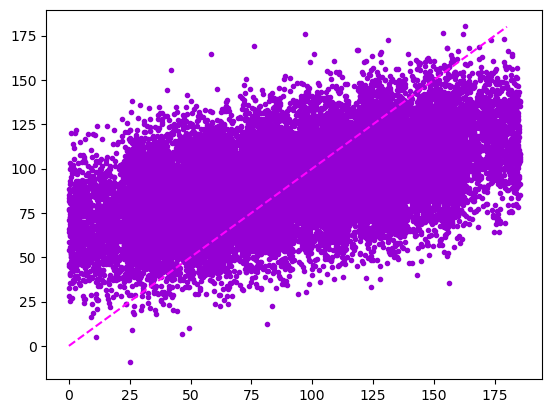


Region 2
RMSE = 0.8930992867756169
  R2 =  0.9996233978805127


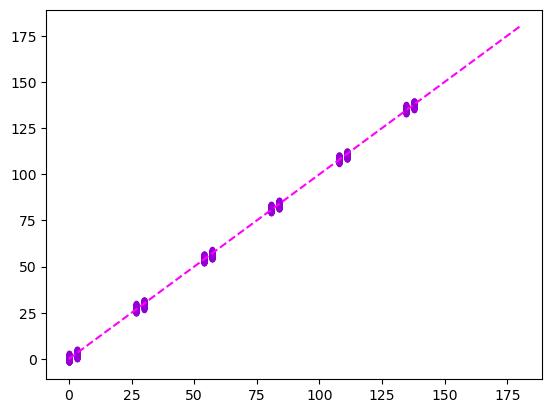


Region 3
RMSE = 40.02970873393434
  R2 =  0.20524758386040443


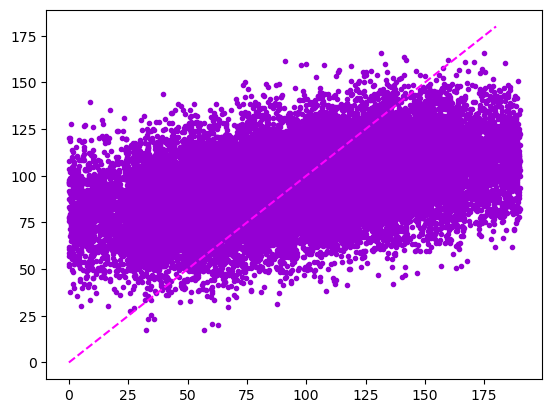

In [21]:
#Training models for each region

for region in [1,2,3]:
    print(f'Region {region}')

    if region == 1:
        X_train = features_train_r1
        y_train = target_train_r1
        X_valid = features_valid_r1
        y_valid = target_valid_r1
    elif region == 2:
        X_train = features_train_r2
        y_train = target_train_r2
        X_valid = features_valid_r2
        y_valid = target_valid_r2
    elif region == 3:
        X_train = features_train_r3
        y_train = target_train_r3
        X_valid = features_valid_r3
        y_valid = target_valid_r3

    model, y_predict, rmse, r2 = train_model(X_train, y_train,
                                                X_valid, y_valid)
   
    # graph
    plt.scatter(y_valid, y_predict, color='darkviolet', marker='.')
    plt.plot([0,180], [0,180], linestyle='--', color='magenta')
    plt.show()

    print()

    row = {'region':region,
           'model':model, 
           'rmse': round(rmse,2), 
           'r2':round(r2,2),
           'mean_oil_real': round(y_valid.mean(), 2),
           'mean_oil_pred': round(y_predict.mean(), 2)
           }
    
    # save information about our models and their metrics by region
    summary_models = pd.concat([summary_models, pd.DataFrame(row, index=[0])], 
                               ignore_index=True)
    
    # save predictions
    predicts[f'real_r{region}']    = y_valid
    predicts[f'predict_r{region}'] = y_predict

In [22]:
predicts.head(5)

,real_r1,predict_r1,real_r2,predict_r2,real_r3,predict_r3
71751,10.038645,95.894952,80.859783,82.663314,61.212375,93.599633
80493,114.551489,77.572583,53.906522,54.431786,41.850118,75.105159
2655,132.603635,77.892640,30.132364,29.748760,57.776581,90.066809
53233,169.072125,90.175134,53.906522,53.552133,100.053761,105.162375
91141,122.325180,70.510088,0.000000,1.243856,109.897122,115.303310


En la tabla `predicts` hemos guardado los valores reales (objetivo) `real_r1`, `real_r2` y `real_r3`, y las predicciones por cada region `predict_r1`, `predict_r2`, `predict_r3`.

A continuación revisemos los modelos y sus métricas en la tabla `summary_models`:

In [23]:
summary_models

,region,model,rmse,r2,mean_oil_real,mean_oil_pred
0,1,LinearRegression(),37.58,0.28,92.08,92.59
1,2,LinearRegression(),0.89,1.00,68.72,68.73
2,3,LinearRegression(),40.03,0.21,94.88,94.97


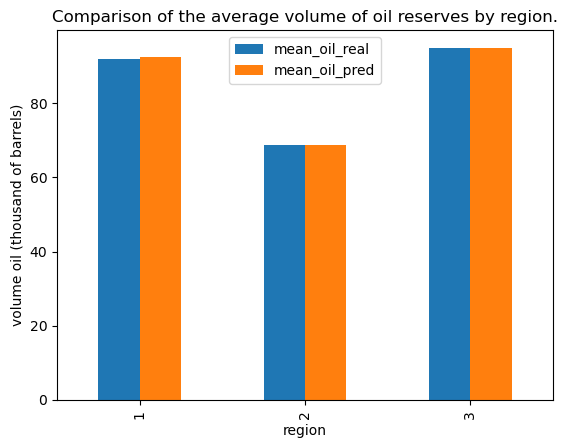

In [24]:
summary_models.set_index('region')[['mean_oil_real', 'mean_oil_pred']].plot(kind='bar')
plt.title('Comparison of the average volume of oil reserves by region.')
plt.ylabel('volume oil (thousand of barrels)')
plt.show()

Nuestra tabla resumen `summary_models` cuenta con información de entrenamiento de los modelos predictivos en las 3 regiones. Se entrenó un modelo en cada región, obteniendo la siguiente información:
- `model`, en cada región se utilizó el algoritmo de regresión lineal
- métrica `rmse` (Raiz cuadrada del Error cuadrático medio)
- métrica `r2` (R-Cuadrado, Coeficiente de determinación)
- `mean_oil_real` volumen promedio de petroleo real por región
- `mean_oil_pred` volumen promedio de petróleo predicho por región.

Hallazgos encontrados:
1. El volumen promedio de reservas de Petróleo en la *región 3* es mayor respecto a las otras regiones, con 94,9 miles de barriles.
2. Las métricas de evaluación de los modelos nos indican en nuestro modelo predictivo en la *región 2* está mejor ajustado respecto a las otras regiones, ya que RMSE es *0.89* es el menor error respecto a las otras regiones. Además la métrica R2 con un 0.99 (casi 1) nos  confirma que la calidad de nuestro modelo es excelente para la *región 2*.
3. Observamos minimas diferencias entre la media del volumen de reservas de petróleo de acuerdo a los datos con respecto a las predicciones (ver gráfico de barras).

# Cálculo de ganancias <a id='gan'></a>

Calcularemos el volumen de reservas suficiente para desarrollar un nuevo pozo sin pérdidas. Compararemos el valor obtenido con el volumen medio de reservas de cada región.

In [25]:
# Specific information

budget = 100000000   # The budget for 200 oil wells is 100 million dollars
wells = 200        # oil wells
income_barrel = 4.5   # unit barrel price 4.5 USD
income_product = 4500 # unit of product (price 1000 barrels 4500 USD)

In [26]:
cost_well = budget / wells # Cost per well
print(f'Investment per well: {(cost_well/10**6)} million USD')

Investment per well: 0.5 million USD


In [27]:
num_product = cost_well / income_product
print(f'Volume of oil reserves: {num_product:.0f} units product (thousand barrels)')

Volume of oil reserves: 111 units product (thousand barrels)


In [28]:
for i in [0,1,2]:    
    print(f' Region {i+1}: Mean Product Volume {summary_models.mean_oil_pred[i]}')

 Region 1: Mean Product Volume 92.59
 Region 2: Mean Product Volume 68.73
 Region 3: Mean Product Volume 94.97


Podemos notar que necesitamos al menos 111 unidades de producto de reservas de petróleo para generar ganancias, comparando este valor con el valor promedio por región que obtuvimos de nuestros modelos de predicción, estas últimas estas por debajo de las unidades de producto que necesitamos para el desarrollo de un pozo con ganancia.

**Calcular ganancia**
Ahora vamos a calcular ganancia escogiendo los mejores 200 pozos con los valores más altos de predicciones y el volumen objetivo de reservas de petróleo. 

In [29]:
# Function "revenue" to calculate profits
# returns the value of the profit, and volume oil total estimated

def revenue(y_real, y_predict, count):
    predict_sorted = y_predict.sort_values(ascending=False)
    selected = y_real[predict_sorted.index][:count]
    
    volume = selected.sum()
    profit = (4500 * volume) - budget
    
    # convert
    profit = profit/1e6    # million USD
    volume = volume / 1000 # volume of reserves in the oil well (thousands of barrels)

    return  profit, volume

In [30]:
# Use table "predicts" to get the actual and predicts values and calculate the profit and estimated volume per region with the function "revenue"
profit, volume = revenue(predicts.real_r1, predicts.predict_r1, wells)
print(f'Region 1: profit {profit:.2f} millions USD, with {volume:.2f} target volume of reserves oil')

profit, volume = revenue(predicts.real_r2, predicts.predict_r2, wells)
print(f'Region 2: profit {profit:.2f} millions USD, with {volume:.2f} target volume of reserves oil')

profit, volume = revenue(predicts.real_r3, predicts.predict_r3, wells)
print(f'Region 3: profit {profit:.2f} millions USD, with {volume:.2f} target volume of reserves oil')

Region 1: profit 33.21 millions USD, with 29.60 target volume of reserves oil
Region 2: profit 24.15 millions USD, with 27.59 target volume of reserves oil
Region 3: profit 27.10 millions USD, with 28.25 target volume of reserves oil


Hemos calculado la ganancia de cada región y el volumen objetivo de reservas de petróleo(número de barriles), de acuerdo con nuestras predicciones. 

La región 1 tiene la más alta ganancia para el desarrollo de 200 pozos petroleros con 33.21 millones USD y un 29.60 volumen objetivo de reservas de petróleo.

A continuación revisaremos una evaluación de riesgos junto con el beneficio promedio de ganancia por región.

# Evaluación de riesgos <a id='rie'></a>

Para evaluar los riesgos en cada región se considerarán las regiones con menos del 2.5% de riesgo de pérdidas. Para realizar esta evaluación haremos lo siguiente:
- Calcularemos el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. Para lo cual, aplicaremos la técnica del bootstrapping para crear 1000 muestras y encontrar una distribución de ganancias.
- Descartaremos las regiones con más del 2.5% de riesgo, y seleccionaremos la región con el beneficio promedio más alto.

## Bootstrapping <a id='boo'></a>

In [31]:
# Function "bootstrap_revenue" to find the profit distribution

def bootstrap_revenue(target, probabilities):
    state = np.random.RandomState(12345)  
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample  = probabilities[target_subsample.index]
        profit, _ = revenue(target_subsample, probs_subsample, 200)
        values.append(profit)
    return pd.Series(values)

In [32]:
# Function "graph_hist" to plot histograms of the distributions that we will obtain from bootstrapping

def grafic_hist(values, mean, lower, upper):
    values.hist()
    plt.axvline(x=mean.mean(), color='darkblue', label='mean')
    plt.axvline(x=lower, color='red', linestyle='--', label='CI 95%')
    plt.axvline(x=upper, color='red', linestyle='--')
    plt.hlines(y=0.001, xmin=lower, xmax=upper, color='black')
    plt.title('Bootstrapping interval based on percentiles')
    plt.xlabel('revenue Millions USD')
    plt.ylabel('frecuency')
    plt.legend()
    plt.show()

In [33]:
# Function "confidence_interval" to calculate the confidence interval for a data distribution. Return:
    # "lower" the lowest value, 
    # "upper" the highest value, 
    # "mean" the average value, and 
    # "risk" the probability of risk in %

def confidence_interval(values, ci):
    # Parameters: "values" (distribution), "ci" (confidence Interval)
    
    x = (100 - ci) / 2
    a = x / 100
    b = (100 - x) / 100
    lower = values.quantile(a)
    upper = values.quantile(b)

    # long_interval = upper - lower
    # long_negative = abs(0 - lower) if lower < 0 else 0
    # risk  = round((long_negative / long_interval) * 100, 1)
    
    risk = (values < 0).mean() * 100
    mean   = values.mean()

    return lower, upper, mean, risk

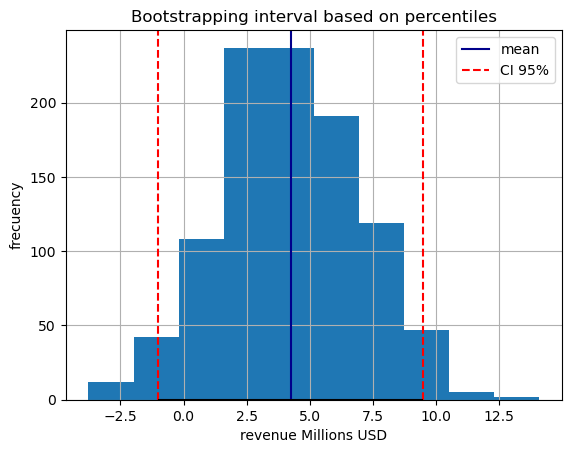

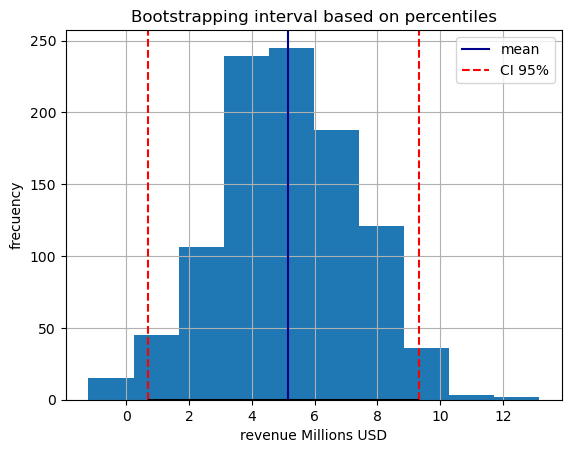

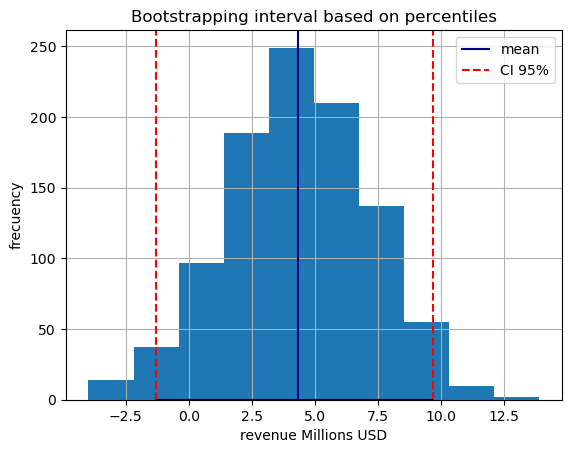

In [34]:
# "ci" Define Confidence Interval
# "risk evaluation" save info about risk per region

ci = 95 # Confidence Interval 95% 
risk_evaluation = pd.DataFrame(columns=['ci_lower', 'ci_upper', 'revenue_mean', 'risk_%'])

# Region 1
values = bootstrap_revenue(predicts.real_r1, predicts.predict_r1)
lower, upper, mean, risk = confidence_interval(values, ci)
risk_evaluation.loc['region_1'] = {'ci_lower':lower, 'ci_upper':upper, 'revenue_mean':mean, 'risk_%':risk}
grafic_hist(values, mean, lower, upper)

# Region 2
values = bootstrap_revenue(predicts.real_r2, predicts.predict_r2)
lower, upper, mean, risk,  = confidence_interval(values, ci)
risk_evaluation.loc['region_2'] = {'ci_lower':lower, 'ci_upper':upper, 'revenue_mean':mean, 'risk_%':risk, }
grafic_hist(values, mean, lower, upper)

# Region 3
values = bootstrap_revenue(predicts.real_r3, predicts.predict_r3)
lower, upper, mean, risk,  = confidence_interval(values, ci)
risk_evaluation.loc['region_3'] = {'ci_lower':lower, 'ci_upper':upper, 'revenue_mean':mean, 'risk_%':risk, }
grafic_hist(values, mean, lower, upper)


In [35]:
print(risk_evaluation)

          ci_lower  ci_upper  revenue_mean  risk_%
region_1 -1.020901  9.479764      4.259385     6.0
region_2  0.688732  9.315476      5.152228     1.0
region_3 -1.288805  9.697070      4.350084     6.4


Hemos calculado un resumen por región nuestros rangos de confianza del 95% (lower 0.025 y upper 0.975), la ganancia promedio y la probabilidad de riesgo, es decir que se produzcan ganancias negativas. 

Las regiones 1 y 3 no cumplen el criterio del mínimo riesgo del 2.5%. Solo la región 2 tenemos 1% de riesgo, por lo que recomendamos la region 2, con una ganancia promedio de 5.15 millones USD.

# Conclusión general <a id='con'></a>

Para encontrar la mejor región para construir pozos de petróleo, relizamos el entrenamiento de un modelo para predecir el volumen de reservas en los nuevos pozos. Seleccionamos los pozos de petróleo con los valores estimados más altos y elegimos la región con el mayor beneficio total para los pozos de petróleo seleccionados, además calculamos el riesgo en cada región. A continuación mostramos los resultados:

- Entrenamiento de modelos predictivos: La región 2 obtuvo el mejor modelo predictivo de volúmenes de reservas de petróleo, con un margen de error 0.89 (rmse) y un excelente ajuste con 0.99 (r2). El modelo fue entrenado mediante el algoritmo de regresión lineal.


*Ganancias y riegos:*

De acuerdo al cálculo de ganancias de los mejores 200 pozos por región obtuvimos que
- Region 1: ganancia 33.21 millones USD, con 29.60 volumen objetivo de reservas de petróleo. 
- Region 2: ganancia 24.15 millones USD, con 27.59 volumen objetivo de reservas de petróleo.
- Region 3: ganancia 27.10 millones USD, con 28.25 volumen objetivo de reservas de petróleo.


La región 1 podría sugerirse como la mejor ya que las ganancias son superiores a las otras regiones, por lo que realizamos la evaluación de riesgos para confirmarlo o negarlo. 

La evaluación de riesgos nos indica lo siguiente:
- Region 1 - Ganancia promedio 4.25 millones USD - risk 6.0%
- Region 2 - Ganancia promedio 5.15 millones USD - risk 1.0%
- Region 3 - Ganancia promedio 4.35 millones USD - risk 6.4%

Debido a que el riesgo de pérdidas en la región 1 y 3 es mayor al 2.5%, se descartan, y se recomienda la región 2 con el beneficio promedio más alto y una probabilidad de riesgo de pérdidas del 1%, bastante mínima!